VENN DIAGRAM

In [1]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

/home/ia/miniconda3/envs/ete3/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


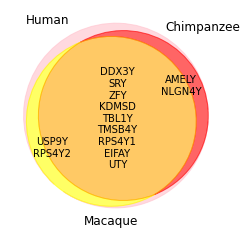

In [2]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

A = set(['SRY', 'RPS4Y1', 'ZFY', 'TBL1Y', 'USP9Y', 'DDX3Y', 'UTY', 'TMSB4Y', 'KDMSD', 'EIFAY', 'RPS4Y2', 'AMELY', 'NLGN4Y'])
B = set(['SRY', 'RPS4Y1', 'ZFY', 'TBL1Y', 'DDX3Y', 'UTY', 'TMSB4Y', 'KDMSD', 'EIFAY', 'AMELY', 'NLGN4Y'])
C = set(['SRY', 'RPS4Y1', 'ZFY', 'TBL1Y', 'USP9Y', 'DDX3Y', 'UTY', 'TMSB4Y', 'KDMSD', 'EIFAY', 'RPS4Y2'])

v = venn3([A,B,C], ('Human', 'Chimpanzee', 'Macaque'),alpha=0.6)
v.get_label_by_id('100').set_text('\n'.join(A-B-C))

v.get_label_by_id('110').set_text('\n'.join(A&B-C))
v.get_label_by_id('101').set_text('\n'.join(A&C-B))
v.get_label_by_id('111').set_text('\n'.join(A&C&B))

v.get_patch_by_id('111').set_color('orange')
v.get_patch_by_id('101').set_color('yellow')
v.get_patch_by_id('110').set_color('red')
v.get_patch_by_id('100').set_color('pink')


In [ ]:
GENE ALIGNMENT SRY (human, macaque and chimp)

In [24]:
with open('sry_msa.fasta') as output:
    for line in output:
        print(line)

>NC_000024.10:c2787682-2786855 Homo sapiens chromosome Y, GRCh38.p13 Primary Assembly

------------------------------------------------------------

-----------------------------------agaagtgagttttggatagtaaaat

aagtttcgaactctggcacctttcaattttgtcgcactctccttgtttttgacaatgcaa

tcatatgcttctgctatgttaagcgtattcaacagcgatgattacagtccagctgtgcaa

gagaatattcccgctctccggagaagctcttccttcctttgcactgaaagctgtaactct

aagtatcagtgtgaaacgggagaaaacagtaaaggcaacgtccaggatagagtgaagcga

cccatgaacgcattcatcgtgtggtctcgcgatcagaggcgcaagatggctctagagaat

cccagaatgcgaaactcagagatcagcaagcagctgggataccagtggaaaatgcttact

gaagccgaaaaatggccattcttccaggaggcacagaaattacaggccatgcacagagag

aaatacccgaattataagtatcgacctcgtcggaaggcgaagatgctgccgaagaattgc

agtttgcttcccgcagatcccgcttcggtactctgcagcgaagtgcaactggacaacagg

ttgtacagggatgactgtacgaaagccacacactcaagaatggagcaccagctaggccac

ttaccgcccatcaacgcagccagctcaccgcagcaacgggaccgctacagccactggaca

aagctgtaggacaatcgggtaacattggctacaaagacctacctagatgctcctttttac

gataacttacagccctcactttcttatgtttagtttcaatattgt

In [25]:
alignment = AlignIO.read("sry_msa.fasta", "fasta")
print(type(alignment))
print(alignment)

<class 'Bio.Align.MultipleSeqAlignment'>
Alignment with 3 rows and 923 columns
--------------------------------------------...tca NC_000024.10:c2787682-2786855
actagggggtaggctggttgggaggggttgagggggtgttgagg...--- NC_006492.4:26210218-26211127
--------------------------------------------...--- NC_027914.1:c82236-81625


In [28]:
def multipleSequenceAlignment(input_fasta):
    """
    Function that performs a multiple sequence alignment using 
    the MAFFT command-line program. The execution is called with 
    the "os" library directly into the terminal. The process creates
    a temporary file called 'temporary_file.fasta' that is deleted 
    after loading the MSA information with BioPython.
    
    Parameters
    ==========
    input_fasta : str
        Path to the input fasta file containing the sequences to align. 
        
    Returns
    =======
    msa : Bio.Align.MultipleSeqAlignment
        A BioPython's MSA object.
    """
    
    # Create the string representing the alignment command
    command = 'mafft --auto '+input_fasta+' > temporary_file.fasta'
    print(command)
    
    # Execute the alignment command
    os.system(command)
    
    # Load the output fasta file into BioPython's MSA object
    msa = AlignIO.read('sry_msa.fasta', 'fasta')
    
    # Remove the temporary output file
    if os.path.exists('temporary_file.fasta'):
        os.remove('temporary_file.fasta')
        
    # Return the MSA object
    
    return msa

In [29]:
msa = multipleSequenceAlignment('sry_msa.fasta')
print(msa)

mafft --auto sry_msa.fasta > temporary_file.fasta
Alignment with 3 rows and 923 columns
--------------------------------------------...tca NC_000024.10:c2787682-2786855
actagggggtaggctggttgggaggggttgagggggtgttgagg...--- NC_006492.4:26210218-26211127
--------------------------------------------...--- NC_027914.1:c82236-81625


In [31]:
# Get the length of the alignment
alignment_lenght = msa.get_alignment_length()
print(alignment_lenght)
# Create a list to store the conserved positions indexes
conserved_indexes = []
# Create a list to store the conserved positions letters
conserved_letters = []

# Get the number of sequences
n_sequences = len(msa)

# Iterate all the alignment index positions
for i in range(alignment_lenght):
    
    # Define the list to store all the letters in the MSA for position i
    letters = []
    
    # Iterate all the sequences in the MSA
    for seq_record in msa:
        
        # Define the current character 
        character = seq_record.seq[i]
        
        # Store only letter characters
        if character != '-':
            letters.append(character)
            
    # Define a set of unique letters
    letters_set = set(letters)
    # Store positions with only one letter in the set
    if len(letters_set) == 1:
        
        # Store positions that are present in all the sequences
        if len(letters) == n_sequences:
            
            #Append index to the list of conserved indexes
            conserved_indexes.append(i)
            #Append character to the list of conserved letters
            conserved_letters.append(letters[0])
            
print('The conserved position indexes are:')
print(conserved_indexes)
print(conserved_letters)

923
The conserved position indexes are:
[174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 293, 294, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 310, 311, 312, 313, 314, 316, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 336, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 376, 378, 379, 380, 381, 382, 383, 384, 385,

In [32]:
import numpy as np

In [33]:
def calculatePID(sequence_i, sequence_j):
    
    count = 0 # Variable containing the count of matching characters
    # iterate
    for k in range(len(sequence_i)):
        p1 = sequence_i[k] # Position k of first alignment 
        p2 = sequence_j[k] # Position k of second alignment
    
        # Only count when we don't have '-' at any position.
        if p1 != '-' and p2 != '-':
            # Only when the sequences match
            if p1 == p2:
                count += 1
            
    # Get length of each sequence
    li = len([p for p in sequence_i if p != '-'])
    lj = len([p for p in sequence_j if p != '-'])
    
    # the PID uses the length of the shortest sequence to convert to percentage
    pid = count/min(li, lj)
    return pid

In [34]:
def distanceMatrixFromMSA(msa):
    
    N = len(msa)
    M = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            
            seqi = msa[i].seq
            seqj = msa[j].seq
            
            if i == j: # the same element always has a PID=1.0
                M[i][j] = 1.0
            if j > i : # We compare only half matrix
                M[i][j] = calculatePID(seqi, seqj)
                M[j][i] = M[i][j] # This to fill the lower half matrix
    return M

Text(0, 0.5, 'Sequence index j')

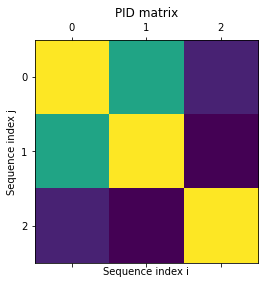

In [35]:
M = distanceMatrixFromMSA(msa)
import matplotlib.pyplot as plt
plt.matshow(M)
plt.title('PID matrix')
plt.xlabel('Sequence index i')
plt.ylabel('Sequence index j')

In [ ]:
GENE ALIGNMENT ZFY(human, macaque and chimp)

In [1]:
with open('zfy_msa.fasta') as output:
    for line in output:
        print(line)

>NC_000024.10:2935381-2982508 Homo sapiens chromosome Y, GRCh38.p13 Primary Assembly

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

------------------------------------------------------------

----------------------------------------------

In [5]:
from Bio import AlignIO 

In [6]:
alignment = AlignIO.read("zfy_msa.fasta", "fasta")
print(type(alignment))
print(alignment)

<class 'Bio.Align.MultipleSeqAlignment'>
Alignment with 3 rows and 54230 columns
--------------------------------------------...--- NC_000024.10:2935381-2982508
ttttataagaagacaatcccaaaaccaattgttagtttacattt...--- NC_006492.4:c26061105-26010263
--------------------------------------------...ata NC_027914.1:239599-288125


In [7]:
def multipleSequenceAlignment(input_fasta):
    """
    Function that performs a multiple sequence alignment using 
    the MAFFT command-line program. The execution is called with 
    the "os" library directly into the terminal. The process creates
    a temporary file called 'temporary_file.fasta' that is deleted 
    after loading the MSA information with BioPython.
    
    Parameters
    ==========
    input_fasta : str
        Path to the input fasta file containing the sequences to align. 
        
    Returns
    =======
    msa : Bio.Align.MultipleSeqAlignment
        A BioPython's MSA object.
    """
    
    # Create the string representing the alignment command
    command = 'mafft --auto '+input_fasta+' > temporary_file.fasta'
    print(command)
    
    # Execute the alignment command
    os.system(command)
    
    # Load the output fasta file into BioPython's MSA object
    msa = AlignIO.read('zfy_msa.fasta', 'fasta')
    
    # Remove the temporary output file
    if os.path.exists('temporary_file.fasta'):
        os.remove('temporary_file.fasta')
        
    # Return the MSA object
    
    return msa

In [20]:
msa = multipleSequenceAlignment('zfy_msa.fasta')
print(msa)

mafft --auto zfy_msa.fasta > temporary_file.fasta
Alignment with 3 rows and 54230 columns
--------------------------------------------...--- NC_000024.10:2935381-2982508
ttttataagaagacaatcccaaaaccaattgttagtttacattt...--- NC_006492.4:c26061105-26010263
--------------------------------------------...ata NC_027914.1:239599-288125


In [18]:
import os

In [19]:
# Get the length of the alignment
alignment_lenght = msa.get_alignment_length()
print(alignment_lenght)
# Create a list to store the conserved positions indexes
conserved_indexes = []
# Create a list to store the conserved positions letters
conserved_letters = []

# Get the number of sequences
n_sequences = len(msa)

# Iterate all the alignment index positions
for i in range(alignment_lenght):
    
    # Define the list to store all the letters in the MSA for position i
    letters = []
    
    # Iterate all the sequences in the MSA
    for seq_record in msa:
        
        # Define the current character 
        character = seq_record.seq[i]
        
        # Store only letter characters
        if character != '-':
            letters.append(character)
            
    # Define a set of unique letters
    letters_set = set(letters)
    # Store positions with only one letter in the set
    if len(letters_set) == 1:
        
        # Store positions that are present in all the sequences
        if len(letters) == n_sequences:
            
            #Append index to the list of conserved indexes
            conserved_indexes.append(i)
            #Append character to the list of conserved letters
            conserved_letters.append(letters[0])
            
print('The conserved position indexes are:')
print(conserved_indexes)
print(conserved_letters)

54230
The conserved position indexes are:
[890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 937, 939, 940, 941, 942, 943, 944, 945, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1008, 1009, 1011, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 

In [11]:
import numpy as np

In [12]:
def calculatePID(sequence_i, sequence_j):
    
    count = 0 # Variable containing the count of matching characters
    # iterate
    for k in range(len(sequence_i)):
        p1 = sequence_i[k] # Position k of first alignment 
        p2 = sequence_j[k] # Position k of second alignment
    
        # Only count when we don't have '-' at any position.
        if p1 != '-' and p2 != '-':
            # Only when the sequences match
            if p1 == p2:
                count += 1
            
    # Get length of each sequence
    li = len([p for p in sequence_i if p != '-'])
    lj = len([p for p in sequence_j if p != '-'])
    
    # the PID uses the length of the shortest sequence to convert to percentage
    pid = count/min(li, lj)
    return pid

In [13]:
def distanceMatrixFromMSA(msa):
    
    N = len(msa)
    M = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            
            seqi = msa[i].seq
            seqj = msa[j].seq
            
            if i == j: # the same element always has a PID=1.0
                M[i][j] = 1.0
            if j > i : # We compare only half matrix
                M[i][j] = calculatePID(seqi, seqj)
                M[j][i] = M[i][j] # This to fill the lower half matrix
    return M

In [15]:
msa = multipleSequenceAlignment('zfy_msa.fasta')
print(msa)

mafft --auto zfy_msa.fasta > temporary_file.fasta
Alignment with 3 rows and 54230 columns
--------------------------------------------...--- NC_000024.10:2935381-2982508
ttttataagaagacaatcccaaaaccaattgttagtttacattt...--- NC_006492.4:c26061105-26010263
--------------------------------------------...ata NC_027914.1:239599-288125


Text(0, 0.5, 'Sequence index j')

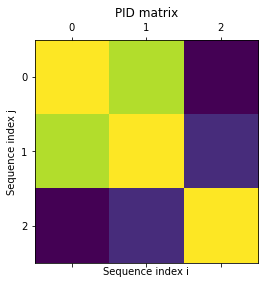

In [16]:
M = distanceMatrixFromMSA(msa)
import matplotlib.pyplot as plt
plt.matshow(M)
plt.title('PID matrix')
plt.xlabel('Sequence index i')
plt.ylabel('Sequence index j')

In [ ]:
GENE ALIGNMENT DDX3Y(human, macaque and chimp)

In [22]:
with open('ddx3y_msa.fasta') as output:
    for line in output:
        print(line)

>NC_000024.10:12903999-12920478 Homo sapiens chromosome Y, GRCh38.p13 Primary Assembly

aggtgtgttatcatcaacgtcattcagtatgtaattgtttcattgtttcttcatcctgtg

atgctaaagccgtatgctcataaagcgcaggcacaccggtagaaaaactagaggggtctg

gagttcctaggtgaaccccagcagcctaaccctgtcaagtctgtcgagcctctggctggt

cacacgtgctgcggaatccactcagctttcctcaggtgcagtcaggtccatcctgcagag

ggaccttctgcggacctgttctttcacctccctaacctgaagattgtattcaaaccaccg

tggatcgctcacgtaaaatggtcactgcgcctaacacctgggatcccgtaacccttatct

atcttggcttcagagagttttttgactagttccaactttgctgaagcttgtcaaaggtag

gtgacggctagttggaacggaaaaattttacgaaacttcctattctcagaagtaaaaggg

aagagagagtgcttaaggaagaagggaagttgagggtgggtaaggagggagcgggagtta

gtggtagattgtcactgtgtttaagatttccccaaggcgaaaaaggcgaaagatatcttg

ctagatccctagaattcgaaggcattaggagagggcggggatagcaaacatcgcgcgaat

tttgagaggcgctgggactacgtaatcccgcgatcttatgactaaacgaacgcgatttag

ggagaagtaacggtagcgataaagggattgggtggtggtggtggaggggtggagccaacg

attacgcacgttgtgcgtgctgtcgtatagctgtgggaggggccatattaccgcgtaggc

taaccagtgcgcttaatagctgtaggtccagtgtaagagttccg

In [24]:
from Bio import AlignIO

In [25]:
alignment = AlignIO.read("ddx3y_msa.fasta", "fasta")
print(type(alignment))
print(alignment)

<class 'Bio.Align.MultipleSeqAlignment'>
Alignment with 3 rows and 17370 columns
aggtgtgttatcatcaacgtcattcagtatgtaattgtttcatt...gtc NC_000024.10:12903999-12920478
aggtgtgttatcatcaacgtca-tcagtatgtaattgtttcatt...gtc NC_006492.4:20428419-20444951
--------------------------------------------...--- NC_027914.1:2108599-2124480


In [32]:
def multipleSequenceAlignment(input_fasta):
    """
    Function that performs a multiple sequence alignment using 
    the MAFFT command-line program. The execution is called with 
    the "os" library directly into the terminal. The process creates
    a temporary file called 'temporary_file.fasta' that is deleted 
    after loading the MSA information with BioPython.
    
    Parameters
    ==========
    input_fasta : str
        Path to the input fasta file containing the sequences to align. 
        
    Returns
    =======
    msa : Bio.Align.MultipleSeqAlignment
        A BioPython's MSA object.
    """
    
    # Create the string representing the alignment command
    command = 'mafft --auto '+input_fasta+' > temporary_file.fasta'
    print(command)
    
    # Execute the alignment command
    os.system(command)
    
    # Load the output fasta file into BioPython's MSA object
    msa = AlignIO.read('ddx3y_msa.fasta', 'fasta')
    
    # Remove the temporary output file
    if os.path.exists('temporary_file.fasta'):
        os.remove('temporary_file.fasta')
        
    # Return the MSA object
    
    return msa

In [33]:
msa = multipleSequenceAlignment('ddx3y_msa.fasta')
print(msa)

mafft --auto ddx3y_msa.fasta > temporary_file.fasta
Alignment with 3 rows and 17370 columns
aggtgtgttatcatcaacgtcattcagtatgtaattgtttcatt...gtc NC_000024.10:12903999-12920478
aggtgtgttatcatcaacgtca-tcagtatgtaattgtttcatt...gtc NC_006492.4:20428419-20444951
--------------------------------------------...--- NC_027914.1:2108599-2124480


In [34]:
# Get the length of the alignment
alignment_lenght = msa.get_alignment_length()
print(alignment_lenght)
# Create a list to store the conserved positions indexes
conserved_indexes = []
# Create a list to store the conserved positions letters
conserved_letters = []

# Get the number of sequences
n_sequences = len(msa)

# Iterate all the alignment index positions
for i in range(alignment_lenght):
    
    # Define the list to store all the letters in the MSA for position i
    letters = []
    
    # Iterate all the sequences in the MSA
    for seq_record in msa:
        
        # Define the current character 
        character = seq_record.seq[i]
        
        # Store only letter characters
        if character != '-':
            letters.append(character)
            
    # Define a set of unique letters
    letters_set = set(letters)
    # Store positions with only one letter in the set
    if len(letters_set) == 1:
        
        # Store positions that are present in all the sequences
        if len(letters) == n_sequences:
            
            #Append index to the list of conserved indexes
            conserved_indexes.append(i)
            #Append character to the list of conserved letters
            conserved_letters.append(letters[0])
            
print('The conserved position indexes are:')
print(conserved_indexes)
print(conserved_letters)

17370
The conserved position indexes are:
[814, 815, 816, 817, 818, 819, 820, 821, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 844, 845, 846, 847, 848, 851, 852, 853, 854, 855, 857, 858, 859, 860, 861, 863, 864, 866, 867, 871, 872, 873, 875, 876, 877, 878, 880, 881, 883, 884, 885, 886, 888, 889, 890, 891, 892, 893, 894, 895, 897, 898, 899, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1002, 1004, 1005, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1015, 1017, 1018, 1019, 1020, 1024, 1025, 1026, 1027, 1028, 1029, 

In [35]:
import numpy as np

In [36]:
def calculatePID(sequence_i, sequence_j):
    
    count = 0 # Variable containing the count of matching characters
    # iterate
    for k in range(len(sequence_i)):
        p1 = sequence_i[k] # Position k of first alignment 
        p2 = sequence_j[k] # Position k of second alignment
    
        # Only count when we don't have '-' at any position.
        if p1 != '-' and p2 != '-':
            # Only when the sequences match
            if p1 == p2:
                count += 1
            
    # Get length of each sequence
    li = len([p for p in sequence_i if p != '-'])
    lj = len([p for p in sequence_j if p != '-'])
    
    # the PID uses the length of the shortest sequence to convert to percentage
    pid = count/min(li, lj)
    return pid

In [37]:
def distanceMatrixFromMSA(msa):
    
    N = len(msa)
    M = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
            
            seqi = msa[i].seq
            seqj = msa[j].seq
            
            if i == j: # the same element always has a PID=1.0
                M[i][j] = 1.0
            if j > i : # We compare only half matrix
                M[i][j] = calculatePID(seqi, seqj)
                M[j][i] = M[i][j] # This to fill the lower half matrix
    return M

Text(0, 0.5, 'Sequence index j')

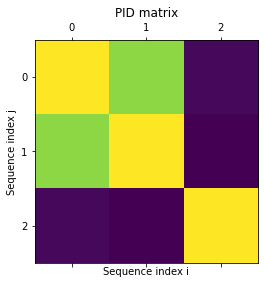

In [38]:
M = distanceMatrixFromMSA(msa)
import matplotlib.pyplot as plt
plt.matshow(M)
plt.title('PID matrix')
plt.xlabel('Sequence index i')
plt.ylabel('Sequence index j')

In [ ]:
PHYLOGENETIC TREE FOR THE GENE SRY (human, macaque and chimpanzee)

In [12]:
tree_file = 'SRY_gene_tree.nhx'

#  The output is stored in one line
with open(tree_file) as tf:
    for l in tf:
        print(l)
        print()
        
#In here we can se the raw file

(((((ENSP00000372547:0.003272[&&NHX:D=N:T=9606],


ENSPTRP00000038745:0.009849[&&NHX:D=N:T=9598]):0.014872[&&NHX:D=N:B=100:T=207598],


(ENSMMUP00000045603:0.005035[&&NHX:D=N:T=9544],


ENSCSAP00000019027:0.006623[&&NHX:D=N:T=60711]):0.040459[&&NHX:D=N:B=100:T=9528]):0.105871[&&NHX:D=N:B=100:T=9526],


ENSPSMP00000010717:0.165614[&&NHX:D=N:T=1328070]):0.002378[&&NHX:D=N:B=84:T=9443],


(((ENSUPAP00010003840:0.038747[&&NHX:D=N:T=9999],


ENSMMMP00000003926:0.099702[&&NHX:D=N:T=9994]):0.062244[&&NHX:D=N:B=99:T=337730],


ENSSVLP00005015809:0.153387[&&NHX:D=N:T=55149]):0.115551[&&NHX:D=N:B=99:T=55153],


(ENSMUSP00000088717:0.07043[&&NHX:D=N:T=10090],


ENSRNOP00000076001:0.074394[&&NHX:D=N:T=10116]):0.352813[&&NHX:D=N:B=100:T=39107]):0.055698[&&NHX:D=N:B=99:T=9989]):0[&&NHX:D=N:B=83:T=314146],


((((((ENSUAMP00000001583:0[&&NHX:D=N:T=9643],


ENSUAMP00000001553:0[&&NHX:D=N:T=9643]):0.001623[&&NHX:D=Y:B=83:T=9643],


ENSUMAP00000034465:0[&&NHX:D=N:T=29073]):0.078015[&&NHX:D=N:B=83:T=9639]

In [13]:
# Load a tree structure from a newick file.Path to create a file into a specific format. T contains our tree object
t = Tree(tree_file)
print(t)
#Scheme image of our tree when we print the Tree


               /-ENSP00000372547
            /-|
           |   \-ENSPTRP00000038745
         /-|
        |  |   /-ENSMMUP00000045603
      /-|   \-|
     |  |      \-ENSCSAP00000019027
     |  |
     |   \-ENSPSMP00000010717
   /-|
  |  |         /-ENSUPAP00010003840
  |  |      /-|
  |  |   /-|   \-ENSMMMP00000003926
  |  |  |  |
  |   \-|   \-ENSSVLP00005015809
  |     |
  |     |   /-ENSMUSP00000088717
  |      \-|
  |         \-ENSRNOP00000076001
  |
  |                  /-ENSUAMP00000001583
--|               /-|
  |            /-|   \-ENSUAMP00000001553
  |           |  |
  |         /-|   \-ENSUMAP00000034465
  |        |  |
  |      /-|   \-ENSVVUP00000016887
  |     |  |
  |   /-|   \-ENSPTIP00000006110
  |  |  |
  |  |   \-ENSEASP00005020750
  |  |
  |  |               /-ENSBBBP00000026908
  |  |            /-|
   \-|         /-|   \-ENSBGRP00000014943
     |        |  |
     |      /-|   \-ENSCHIP00000020142
     |     |  |
     |   /-|   \-ENSCHYP00000026367
     |  |  |
 

In [14]:
print(type(t))
help(t)
#t object?if we call type on the t we will see the pre node
#help is to print the documentation of that class

<class 'ete3.coretype.tree.TreeNode'>
Help on TreeNode in module ete3.coretype.tree object:

class TreeNode(builtins.object)
 |  TreeNode (Tree) class is used to store a tree structure. A tree
 |  consists of a collection of TreeNode instances connected in a
 |  hierarchical way. Trees can be loaded from the New Hampshire Newick
 |  format (newick).
 |  
 |  :argument newick: Path to the file containing the tree or, alternatively,
 |     the text string containing the same information.
 |  
 |  :argument 0 format: subnewick format
 |  
 |    .. table::
 |  
 |        ======  ==============================================
 |        FORMAT  DESCRIPTION
 |        ======  ==============================================
 |        0        flexible with support values
 |        1        flexible with internal node names
 |        2        all branches + leaf names + internal supports
 |        3        all branches + all names
 |        4        leaf branches + leaf names
 |        5        i

In [15]:
# Iterate leafs inside the tree
for l in t:
    print(l)
    print(l.name)
    print()
    #For L that now represents leafs we print it and we can call the dot name. 


--ENSP00000372547
ENSP00000372547


--ENSPTRP00000038745
ENSPTRP00000038745


--ENSMMUP00000045603
ENSMMUP00000045603


--ENSCSAP00000019027
ENSCSAP00000019027


--ENSPSMP00000010717
ENSPSMP00000010717


--ENSUPAP00010003840
ENSUPAP00010003840


--ENSMMMP00000003926
ENSMMMP00000003926


--ENSSVLP00005015809
ENSSVLP00005015809


--ENSMUSP00000088717
ENSMUSP00000088717


--ENSRNOP00000076001
ENSRNOP00000076001


--ENSUAMP00000001583
ENSUAMP00000001583


--ENSUAMP00000001553
ENSUAMP00000001553


--ENSUMAP00000034465
ENSUMAP00000034465


--ENSVVUP00000016887
ENSVVUP00000016887


--ENSPTIP00000006110
ENSPTIP00000006110


--ENSEASP00005020750
ENSEASP00005020750


--ENSBBBP00000026908
ENSBBBP00000026908


--ENSBGRP00000014943
ENSBGRP00000014943


--ENSCHIP00000020142
ENSCHIP00000020142


--ENSCHYP00000026367
ENSCHYP00000026367


--ENSMMNP00015003187
ENSMMNP00015003187


--ENSSSCP00000025359
ENSSSCP00000025359


--ENSSSCP00000027045
ENSSSCP00000027045



In [17]:
from IPython.display import Image

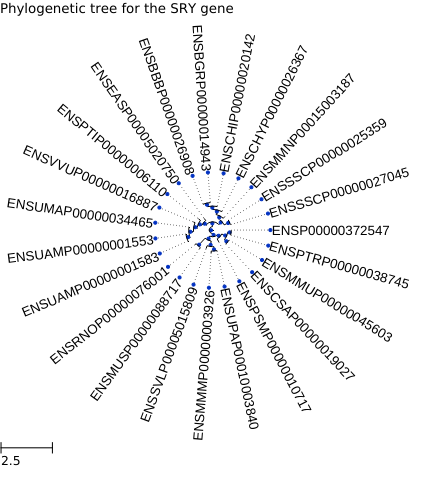

In [18]:
# Display the Tree in a circular style
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
#letter c represents the circular style

# Options | Uncomment to see their effect

circular_style.scale = 20 #change the scale  first option
#circular_style.arc_start = 180 # 0 degrees = 3 o'clock #where the ark is starting in degrees second option
#circular_style.arc_span = 180 #change the arc spand. half a circle for 180 degrees. my tree now occupies half of a circle third title
circular_style.title.add_face(TextFace("Phylogenetic tree for the SRY gene", fsize=10), column=0) #to put a title is the forth option

td = t.render("SRY_gene_tree.png", w=120, units="mm", tree_style=circular_style)
Image('SRY_gene_tree.png')

#the tree only contains the information about the tree. the style is a completely separate thing. 
#Tree style method 
# we can use png, pdf or svng


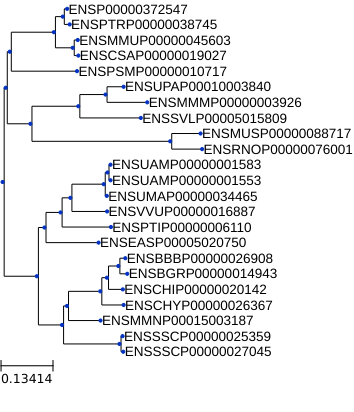

In [19]:
# Display the Tree in a standard tree style
ts = TreeStyle()

# Options | Uncomment to see their effect

#ts.show_leaf_name = True # Names of the leafs #need to change TRUE for FALSE to see a change
#ts.show_branch_length = True #To see the leafs
#ts.show_branch_support = True
#ts.scale = 1000 # Zoom in the Y-axis
#ts.rotation = 90 #upstream downstream, chantge the rotation in degrees
#ts.title.add_face(TextFace("2-hydroxymuconate tautomerase enzyme Tree", fsize=10), column=0)

td = t.render("SRY_gene_tree.png", w=100, units="mm", tree_style=ts)
Image('SRY_gene_tree.png')

In [20]:
PHYLOGENETIC TREE FOR ZFY GENE

SyntaxError: invalid syntax (<ipython-input-20-82bc6cdf0b86>, line 1)

In [21]:
from ete3 import Tree, TreeStyle, TextFace, NodeStyle

In [31]:
tree_file = 'ZFY_gene_tree.nh'

#  The output is stored in one line
with open(tree_file) as tf:
    for l in tf:
        print(l)
        print()
        
#In here we can se the raw file

(((((((((ENSVURP00010014298_Vurs_:0.002858,


ENSPCIP00000032347_Pcin_:0.006319):0.003748,


ENSMEUP00000003691_Neug_:0.017898):0.002428,


ENSSHAP00000005703_Shar_:0.020102):0.006691,


ENSMODP00000009326_Mdom_:0.013439):0.037181,


(((ENSRFEP00010004161_Rfer_:0.030804,


ENSMLUP00000003603_Mluc_:0.042257):0.009899,


ENSOPRP00000005466_Opri_:0.089945):0,


((((ENSLAFP00000005619_Lafr_:0.023361,


ENSPCAP00000008229_Pcap_:0.072537):0.021447,


ENSDNOP00000029334_Dnov_:0.03749):0.008422,


((((ENSCCAP00000037745_Ccap_:0,


ENSCCAP00000011214_Ccap_:0):0,


ENSRBIP00000034376_Rbie_:0.062315):0.010162,


((ENSEASP00005002907_Eaas_:0.091536,


ENSUAMP00000012127_Uame_:0.119434):0.092819,


ENSUAMP00000003856_Uame_:0.033645):0.019798):0.028386,


ENSMSIP00000022230_Mspi_:0.187213):0.014392):0,


((((((((((((((ENSCATP00000038368_Caty_:0.000561,


ENSMLEP00000027613_Mleu_:0.001121):0,


((ENSMNEP00000045180_Mnem_:0,


ENSMFAP00000016669_Mfas_:0):0,


ENSMMUP00000012830_Mmul_:0.001683):0.00112

In [5]:
# Load a tree structure from a newick file.Path to create a file into a specific format. T contains our tree object
t = Tree(tree_file)
print(t)
#Scheme image of our tree when we print the Tree


                           /-ENSVURP00010014298_Vurs_
                        /-|
                     /-|   \-ENSPCIP00000032347_Pcin_
                    |  |
                  /-|   \-ENSMEUP00000003691_Neug_
                 |  |
               /-|   \-ENSSHAP00000005703_Shar_
              |  |
              |   \-ENSMODP00000009326_Mdom_
              |
              |         /-ENSRFEP00010004161_Rfer_
              |      /-|
              |   /-|   \-ENSMLUP00000003603_Mluc_
              |  |  |
              |  |   \-ENSOPRP00000005466_Opri_
              |  |
              |  |            /-ENSLAFP00000005619_Lafr_
              |  |         /-|
              |  |      /-|   \-ENSPCAP00000008229_Pcap_
              |  |     |  |
              |  |     |   \-ENSDNOP00000029334_Dnov_
              |  |     |
              |  |     |            /-ENSCCAP00000037745_Ccap_
              |  |     |         /-|
              |  |   /-|      /-|   \-ENSCCAP00000011214_Ccap_
      

In [32]:
print(type(t))

<class 'ete3.phylo.phylotree.PhyloNode'>


In [33]:
# Iterate leafs inside the tree
for l in t:
    print(l)
    print(l.name)
    print()
    #For L that now represents leafs we print it and we can call the dot name. 


--ENSVURP00010014298_Vurs_
ENSVURP00010014298_Vurs_


--ENSPCIP00000032347_Pcin_
ENSPCIP00000032347_Pcin_


--ENSMEUP00000003691_Neug_
ENSMEUP00000003691_Neug_


--ENSSHAP00000005703_Shar_
ENSSHAP00000005703_Shar_


--ENSMODP00000009326_Mdom_
ENSMODP00000009326_Mdom_


--ENSRFEP00010004161_Rfer_
ENSRFEP00010004161_Rfer_


--ENSMLUP00000003603_Mluc_
ENSMLUP00000003603_Mluc_


--ENSOPRP00000005466_Opri_
ENSOPRP00000005466_Opri_


--ENSLAFP00000005619_Lafr_
ENSLAFP00000005619_Lafr_


--ENSPCAP00000008229_Pcap_
ENSPCAP00000008229_Pcap_


--ENSDNOP00000029334_Dnov_
ENSDNOP00000029334_Dnov_


--ENSCCAP00000037745_Ccap_
ENSCCAP00000037745_Ccap_


--ENSCCAP00000011214_Ccap_
ENSCCAP00000011214_Ccap_


--ENSRBIP00000034376_Rbie_
ENSRBIP00000034376_Rbie_


--ENSEASP00005002907_Eaas_
ENSEASP00005002907_Eaas_


--ENSUAMP00000012127_Uame_
ENSUAMP00000012127_Uame_


--ENSUAMP00000003856_Uame_
ENSUAMP00000003856_Uame_


--ENSMSIP00000022230_Mspi_
ENSMSIP00000022230_Mspi_


--ENSCATP00000038368_Caty_


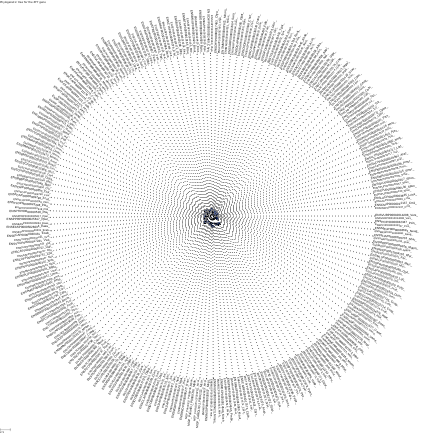

In [34]:
# Display the Tree in a circular style
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
#letter c represents the circular style

# Options | Uncomment to see their effect

circular_style.scale = 20 #change the scale  first option
#circular_style.arc_start = 180 # 0 degrees = 3 o'clock #where the ark is starting in degrees second option
#circular_style.arc_span = 180 #change the arc spand. half a circle for 180 degrees. my tree now occupies half of a circle third title
circular_style.title.add_face(TextFace("Phylogenetic tree for the ZFY gene", fsize=10), column=0) #to put a title is the forth option

td = t.render("ZFY_gene_tree.png", w=120, units="mm", tree_style=circular_style)
Image('ZFY_gene_tree.png')

#the tree only contains the information about the tree. the style is a completely separate thing. 
#Tree style method 
# we can use png, pdf or svng

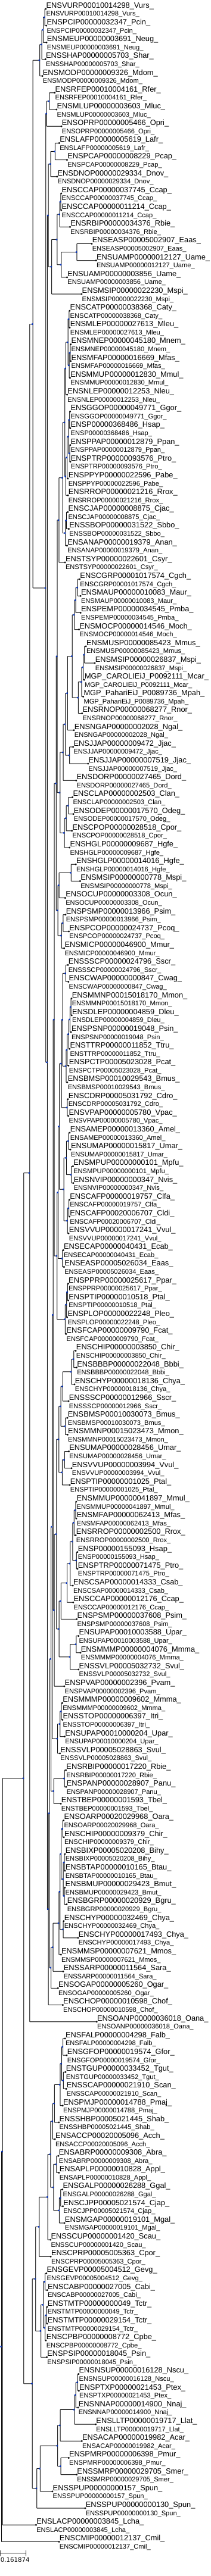

In [35]:
# Display the Tree in a standard tree style
ts = TreeStyle()
# Options | Uncomment to see their effect

#ts.show_leaf_name = True # Names of the leafs #need to change TRUE for FALSE to see a change
#ts.show_branch_length = True #To see the leafs
#ts.show_branch_support = True
#ts.scale = 1000 # Zoom in the Y-axis
#ts.rotation = 90 #upstream downstream, chantge the rotation in degrees
#ts.title.add_face(TextFace("2-hydroxymuconate tautomerase enzyme Tree", fsize=10), column=0)

td = t.render("ZFY_gene_tree.png", w=100, units="mm", tree_style=ts)
Image('ZFY_gene_tree.png')

In [9]:
PHYLOGENETIC TREE FOR DDX3Y

SyntaxError: invalid syntax (<ipython-input-9-41232b73f726>, line 1)

In [36]:
from ete3 import Tree, TreeStyle, TextFace, NodeStyle

In [37]:
tree_file = 'DDX3Y_gene_tree_class.nh'

#  The output is stored in one line
with open(tree_file) as tf:
    for l in tf:
        print(l)
        print()
        
#In here we can se the raw file

(((((((((((((ENSVURP00010003374_Vurs_:0.005851,


ENSPCIP00000000251_Pcin_:0.008689):0.006551,


ENSMEUP00000005944_Neug_:0.018113):0.00139,


ENSMODP00000026376_Mdom_:0.019599):0.004109,


ENSSHAP00000008803_Shar_:0.016462):0.036665,


((((((((((ENSRFEP00010004956_Rfer_:0.02275,


ENSMLUP00000009323_Mluc_:0.048606):0.001805,


ENSPVAP00000013813_Pvam_:0.024369):0.005571,


ENSEEUP00000002580_Eeur_:0.065768):0.002301,


(((((((((ENSBIXP00005012392_Bihy_:0,


ENSBTAP00000047104_Btau_:0):0.001188,


ENSBIXP00005028086_Bihy_:0.097419):0,


(ENSBGRP00000029228_Bgru_:0,


ENSBMUP00000017141_Bmut_:0):0.00119):0.004161,


(ENSMMSP00000019288_Mmos_:0,


ENSMMSP00000025538_Mmos_:0.010013):0.006089):0.001206,


((ENSCHIP00000029996_Chir_:0.000817,


ENSOARP00020023446_Oara_:0.004097):0.001364,


ENSCHYP00000032927_Chya_:0.008306):0.001794):0.008461,


ENSCHIP00000000025_Chir_:0.092362):0.006713,


((ENSPCTP00005028144_Pcat_:0.002587,


ENSBMSP00010023471_Bmus_:0.01803):0,


(((ENSDLEP00000024269

In [87]:
# Load a tree structure from a newick file.Path to create a file into a specific format. T contains our tree object
t = Tree(tree_file)
print(t)
#Scheme image of our tree when we print the Tree


                                       /-ENSVURP00010003374_Vurs_
                                    /-|
                                 /-|   \-ENSPCIP00000000251_Pcin_
                                |  |
                              /-|   \-ENSMEUP00000005944_Neug_
                             |  |
                           /-|   \-ENSMODP00000026376_Mdom_
                          |  |
                          |   \-ENSSHAP00000008803_Shar_
                          |
                          |                              /-ENSRFEP00010004956_Rfer_
                          |                           /-|
                          |                        /-|   \-ENSMLUP00000009323_Mluc_
                          |                       |  |
                          |                     /-|   \-ENSPVAP00000013813_Pvam_
                          |                    |  |
                          |                    |   \-ENSEEUP00000002580_Eeur_
                         

In [88]:
print(type(t))

<class 'ete3.coretype.tree.TreeNode'>


In [89]:
# Iterate leafs inside the tree
for l in t:
    print(l)
    print(l.name)
    print()
    #For L that now represents leafs we print it and we can call the dot name. 
    


--ENSVURP00010003374_Vurs_
ENSVURP00010003374_Vurs_


--ENSPCIP00000000251_Pcin_
ENSPCIP00000000251_Pcin_


--ENSMEUP00000005944_Neug_
ENSMEUP00000005944_Neug_


--ENSMODP00000026376_Mdom_
ENSMODP00000026376_Mdom_


--ENSSHAP00000008803_Shar_
ENSSHAP00000008803_Shar_


--ENSRFEP00010004956_Rfer_
ENSRFEP00010004956_Rfer_


--ENSMLUP00000009323_Mluc_
ENSMLUP00000009323_Mluc_


--ENSPVAP00000013813_Pvam_
ENSPVAP00000013813_Pvam_


--ENSEEUP00000002580_Eeur_
ENSEEUP00000002580_Eeur_


--ENSBIXP00005012392_Bihy_
ENSBIXP00005012392_Bihy_


--ENSBTAP00000047104_Btau_
ENSBTAP00000047104_Btau_


--ENSBIXP00005028086_Bihy_
ENSBIXP00005028086_Bihy_


--ENSBGRP00000029228_Bgru_
ENSBGRP00000029228_Bgru_


--ENSBMUP00000017141_Bmut_
ENSBMUP00000017141_Bmut_


--ENSMMSP00000019288_Mmos_
ENSMMSP00000019288_Mmos_


--ENSMMSP00000025538_Mmos_
ENSMMSP00000025538_Mmos_


--ENSCHIP00000029996_Chir_
ENSCHIP00000029996_Chir_


--ENSOARP00020023446_Oara_
ENSOARP00020023446_Oara_


--ENSCHYP00000032927_Chya_


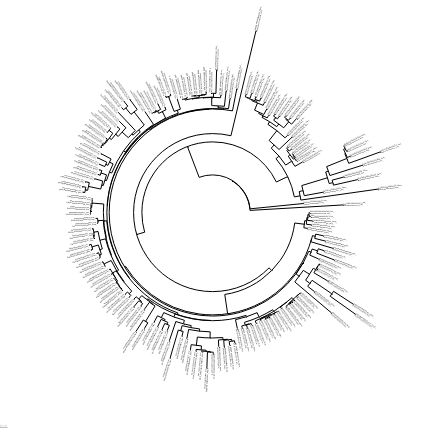

In [43]:
# Display the Tree in a circular style
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
#letter c represents the circular style

# Options | Uncomment to see their effect

#circular_style.scale = 20 #change the scale  first option
#circular_style.arc_start = 180 # 0 degrees = 3 o'clock #where the ark is starting in degrees second option
#circular_style.arc_span = 180 #change the arc spand. half a circle for 180 degrees. my tree now occupies half of a circle third title
#circular_style.title.add_face(TextFace("Phylogenetic tree for the SRY gene", fsize=10), column=0) #to put a title is the forth option

td = t.render("DDX3Y_gene_tree_class.png", w=120, units="mm", tree_style=circular_style)
Image('DDX3Y_gene_tree_class.png')

#the tree only contains the information about the tree. the style is a completely separate thing. 
#Tree style method 